In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from collections import Counter

In [3]:
df = pd.read_csv('StudentSurvey.csv', encoding='latin1')

In [4]:
df.info()
print(df.head())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB
   SN  Total Feedback Given  Total Configured  \
0   1                     1                12   
1   2                     1                12 

In [5]:
df['Average Score'] = df['Average/ Percentage'].str.split('/').str[0].astype(float)

In [6]:
print("Number of questions:", len(df))
print("Columns in the dataset:", df.columns.tolist())
print("First 5 rows:")
print(df.head())

Number of questions: 580
Columns in the dataset: ['SN', 'Total Feedback Given', 'Total Configured', 'Questions', 'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5', 'Average/ Percentage', 'Course Name ', 'Basic Course', 'Average Score']
First 5 rows:
   SN  Total Feedback Given  Total Configured  \
0   1                     1                12   
1   2                     1                12   
2   3                     1                12   
3   4                     1                12   
4   5                     1                12   

                                           Questions  Weightage 1  \
0  How much of the syllabus was covered in the cl...            0   
1  How well did the teachers prepare for the clas...            0   
2    How well were the teachers able to communicate?            0   
3  The teachers approach to teaching can best be...            0   
4  Fairness of the internal evaluation process by...            0   

   Weightage 2  

In [7]:
print("\nAverage Score Statistics:")
print(df['Average Score'].describe())


Average Score Statistics:
count    580.000000
mean       3.842793
std        0.629038
min        1.330000
25%        3.500000
50%        3.920000
75%        4.250000
max        5.000000
Name: Average Score, dtype: float64


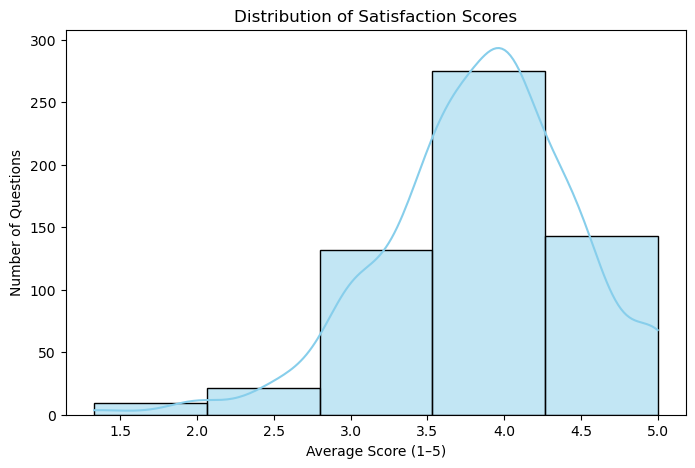

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['Average Score'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Satisfaction Scores")
plt.xlabel("Average Score (1–5)")
plt.ylabel("Number of Questions")
plt.show()

/var/folders/tx/j6wk596937vch48l0g72s39r0000gn/T/ipykernel_49380/3330893341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Score', y='Questions', data=df, palette='viridis')
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


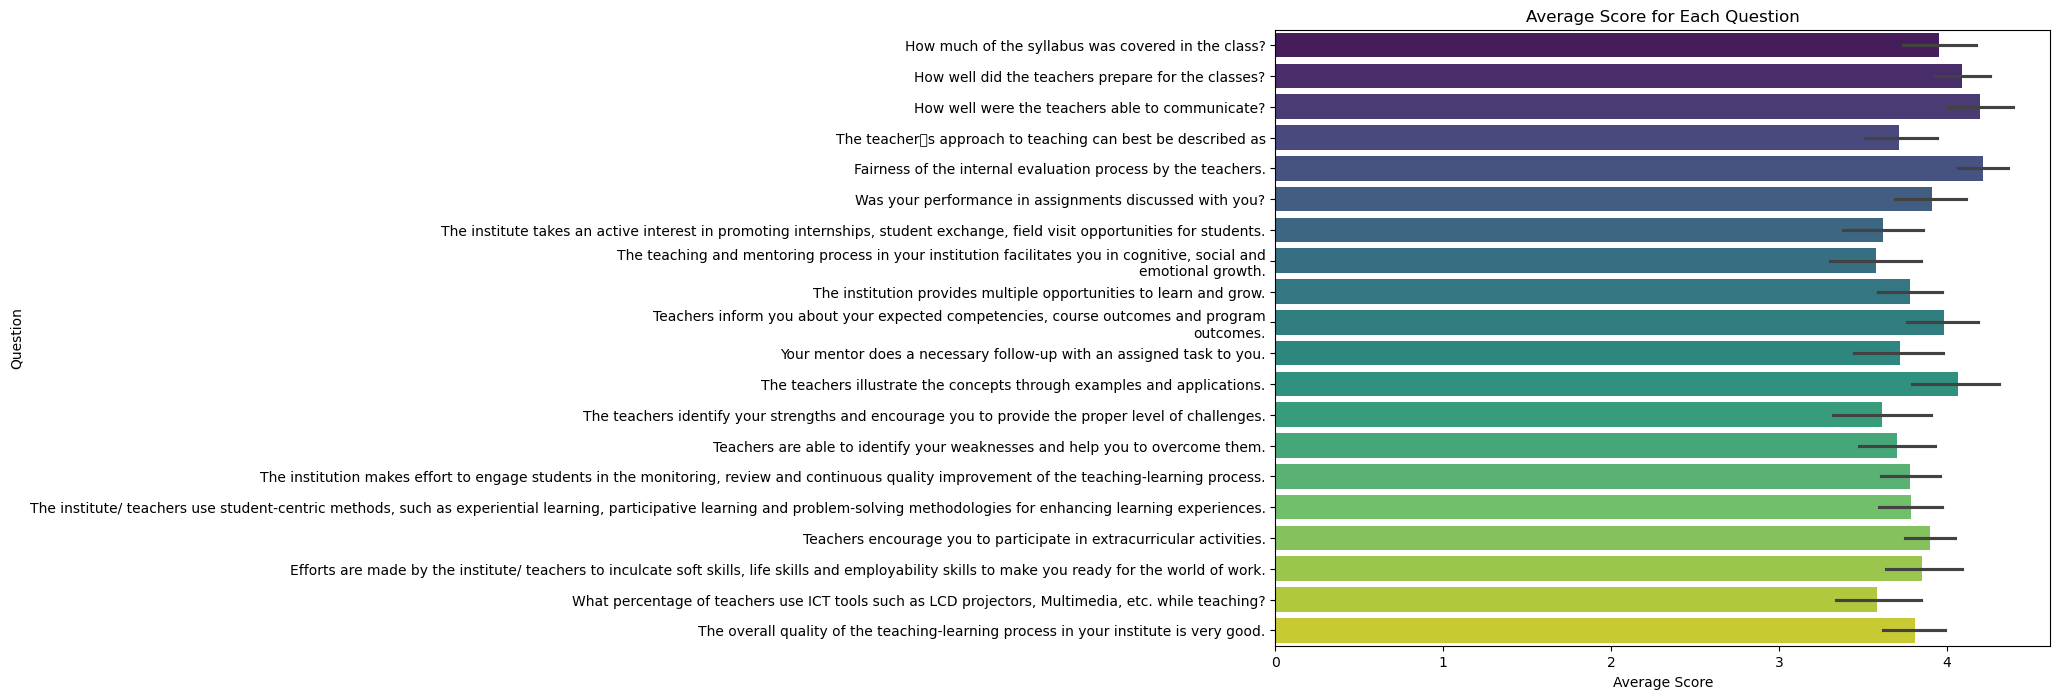

In [9]:
plt.figure(figsize=(10,8))
sns.barplot(x='Average Score', y='Questions', data=df, palette='viridis')
plt.title("Average Score for Each Question")
plt.xlabel("Average Score")
plt.ylabel("Question")
plt.show()

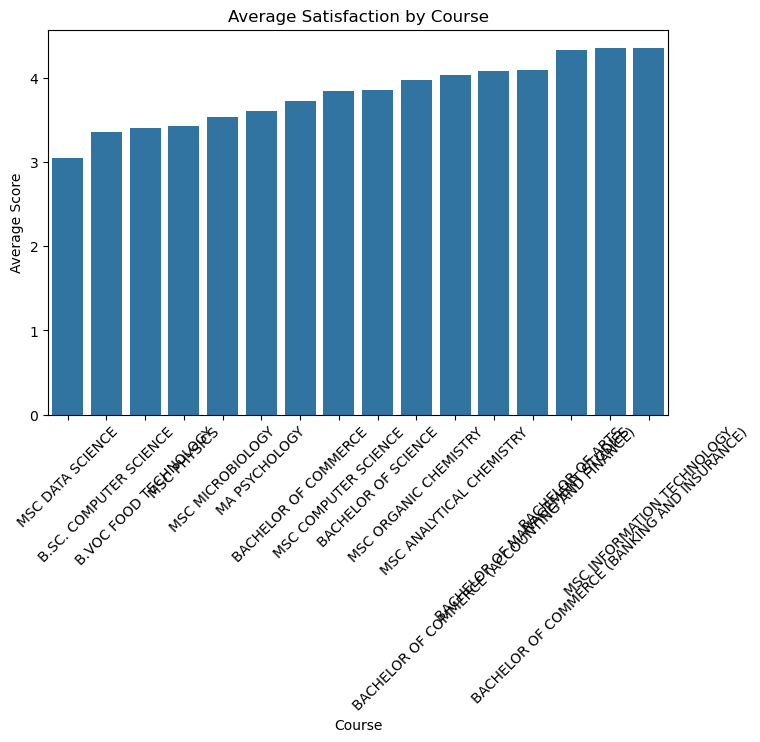

In [10]:
course_avg = df.groupby('Basic Course')['Average Score'].mean().sort_values()
plt.figure(figsize=(8,5))
sns.barplot(x=course_avg.index, y=course_avg.values)
plt.title("Average Satisfaction by Course")
plt.xlabel("Course")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

In [66]:
df["Rating"] = df["Average/ Percentage"].apply(lambda x: float(str(x).split("/")[0]))

In [68]:
#Top 3 events with highest satisfaction
avg_rating = df.groupby("Basic Course")["Rating"].mean().sort_values(ascending=False)
print(avg_rating.head(3))

Basic Course
MSC INFORMATION TECHNOLOGY                      4.3545
BACHELOR OF COMMERCE (BANKING AND INSURANCE)    4.3500
BACHELOR OF ARTS                                4.3350
Name: Rating, dtype: float64


In [11]:
def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

In [12]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/manvithakiran/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
df['Average Score'] = df['Average/ Percentage'].str.split('/').str[0].astype(float)

In [14]:
positive_comments = ["Excellent teaching!", "Very satisfied with the course.", "Learned a lot!"]
neutral_comments = ["It was okay.", "Average experience.", "Nothing special."]
negative_comments = ["Poor teaching.", "I didn't understand the topics.", "Needs improvement."]

In [15]:
def generate_comment(score):
    if score >= 4:
        return random.choice(positive_comments)
    elif score == 3:
        return random.choice(neutral_comments)
    else:
        return random.choice(negative_comments)

In [16]:
sia = SentimentIntensityAnalyzer()

In [17]:
def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

In [18]:
df['Comments'] = df['Average Score'].apply(generate_comment)

In [19]:
df['Sentiment'] = df['Comments'].apply(get_sentiment)

# Show results
print(df[['Questions','Average Score','Comments','Sentiment']].head())
print("\nSentiment Counts:")
print(df['Sentiment'].value_counts())

                                           Questions  Average Score  \
0  How much of the syllabus was covered in the cl...            3.0   
1  How well did the teachers prepare for the clas...            5.0   
2    How well were the teachers able to communicate?            5.0   
3  The teachers approach to teaching can best be...            3.0   
4  Fairness of the internal evaluation process by...            4.0   

                          Comments Sentiment  
0                 Nothing special.  Negative  
1                   Learned a lot!   Neutral  
2              Excellent teaching!  Positive  
3              Average experience.   Neutral  
4  Very satisfied with the course.  Positive  

Sentiment Counts:
Sentiment
Positive    265
Neutral     205
Negative    110
Name: count, dtype: int64


In [20]:
top_events = df.sort_values('Average Score', ascending=False).head(3)
print("Top 3 events with highest satisfaction:")
print(top_events[['Questions', 'Average Score']])

Top 3 events with highest satisfaction:
                                             Questions  Average Score
30   Your mentor does a necessary follow-up with an...            5.0
191  The teachers illustrate the concepts through e...            5.0
182    How well were the teachers able to communicate?            5.0


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


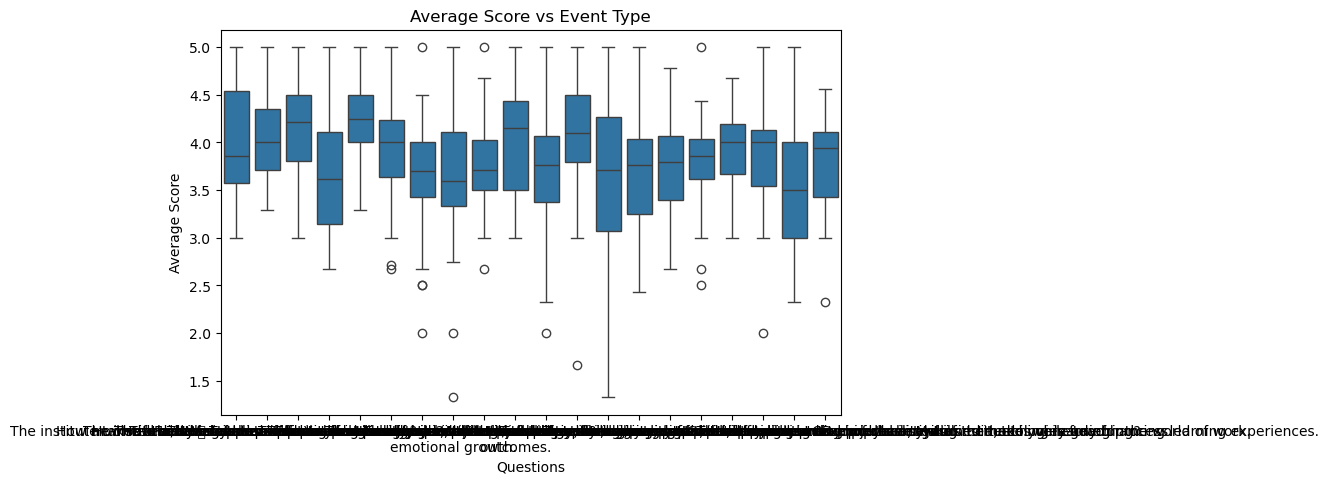

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Questions', y='Average Score', data=df)
plt.title("Average Score vs Event Type")
plt.show()

Departments hosting the most-liked events:
Basic Course
MSC INFORMATION TECHNOLOGY                       4.354500
BACHELOR OF COMMERCE (BANKING AND INSURANCE)     4.350000
BACHELOR OF ARTS                                 4.335000
BACHELOR OF MANAGEMENT STUDIES                   4.092167
BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE)    4.075500
MSC ANALYTICAL CHEMISTRY                         4.033750
MSC ORGANIC CHEMISTRY                            3.972500
BACHELOR OF SCIENCE                              3.852667
MSC COMPUTER SCIENCE                             3.845500
BACHELOR OF COMMERCE                             3.719000
MA PSYCHOLOGY                                    3.600500
MSC MICROBIOLOGY                                 3.538000
MSC PHYSICS                                      3.425000
B.VOC FOOD TECHNOLOGY                            3.400000
B.SC. COMPUTER SCIENCE                           3.354500
MSC DATA SCIENCE                                 3.050500
Name: Average Sc

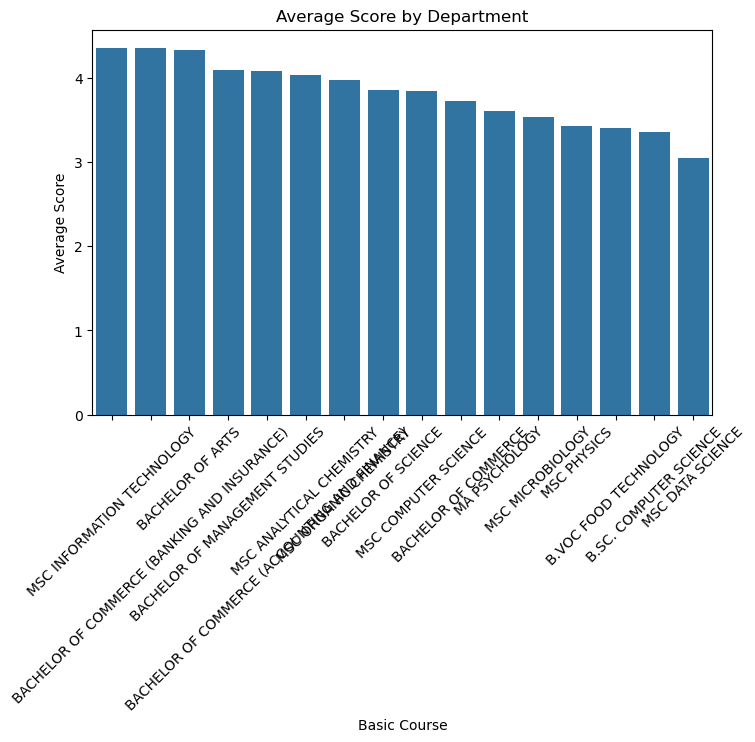

In [22]:
dept_avg = df.groupby('Basic Course')['Average Score'].mean().sort_values(ascending=False)
print("Departments hosting the most-liked events:")
print(dept_avg)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x=dept_avg.index, y=dept_avg.values)
plt.title("Average Score by Department")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

Sentiment
Positive    265
Neutral     205
Negative    110
Name: count, dtype: int64


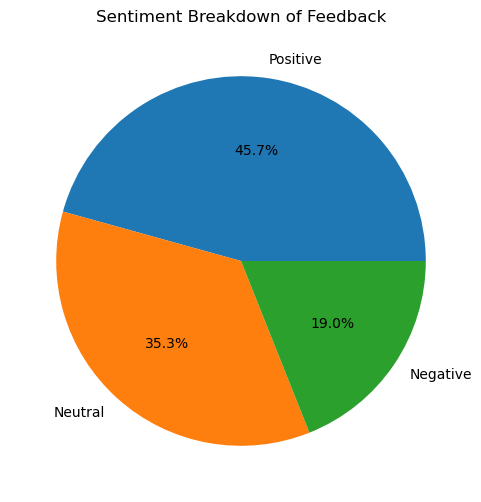

In [23]:
sentiment_counts = df["Sentiment"].value_counts()
print(sentiment_counts)

plt.figure(figsize=(6,6))
sentiment_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Sentiment Breakdown of Feedback")
plt.ylabel("")
plt.show()

In [60]:
df.groupby("Basic Course")["Rating"].mean().sort_values().plot(kind="barh")

KeyError: 'Column not found: Rating'

In [24]:
!pip install wordcloud
from wordcloud import WordCloud

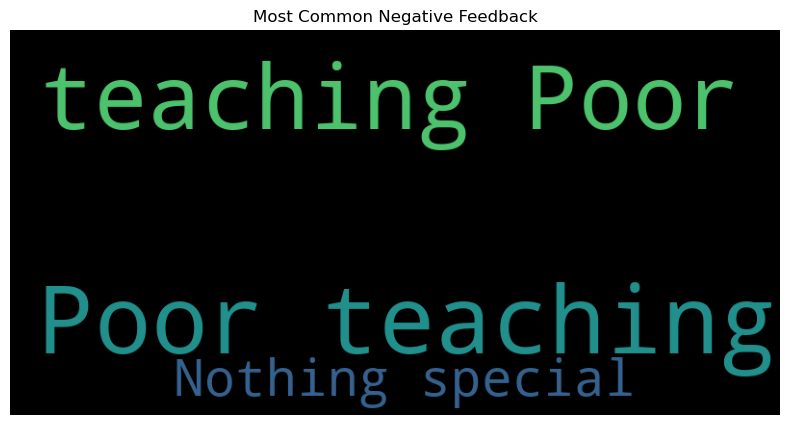

In [25]:
negative_text = " ".join(df[df["Sentiment"]=="Negative"]["Comments"])
wordcloud = WordCloud(width=800, height=400).generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most Common Negative Feedback")
plt.show()

In [26]:
print("END, THANK YOU")

END, THANK YOU
